# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).


FEEDBACK FROM STUDENT: Seems that the link above is broken!


Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
torch.manual_seed(seed=42)
## YOUR CODE HERE ##
train_transform= transforms.Compose([transforms.RandomCrop(32, padding=4),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.CIFAR10('CIFAR10_data/', download=True,
                                          train=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.CIFAR10('CIFAR10_data/', download=True,
                                         train=False, transform=test_transform)

test_size = int(len(test_data) * 0.75)
valid_size = len(test_data) - test_size
test_data, valid_data = torch.utils.data.random_split(test_data, [test_size, valid_size])

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False)
#Classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(image.T)
        plt.show()

Number of training images: 50,000
Number of validation images: 2,500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of test images: 7,500
Image size: 32x32 pixels
Train Loader Examples
deer


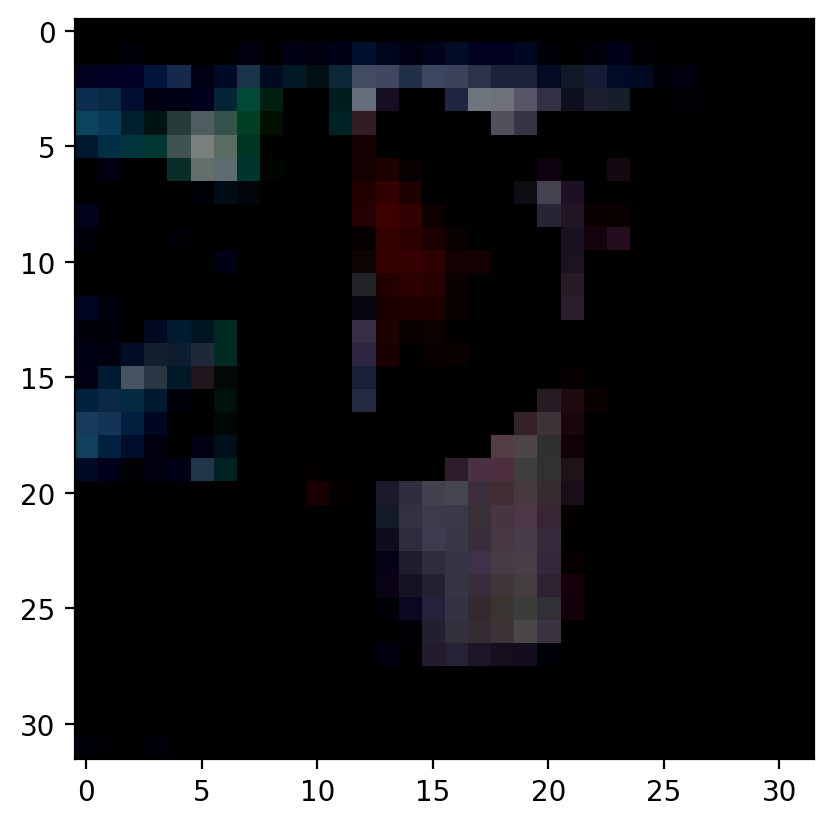

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


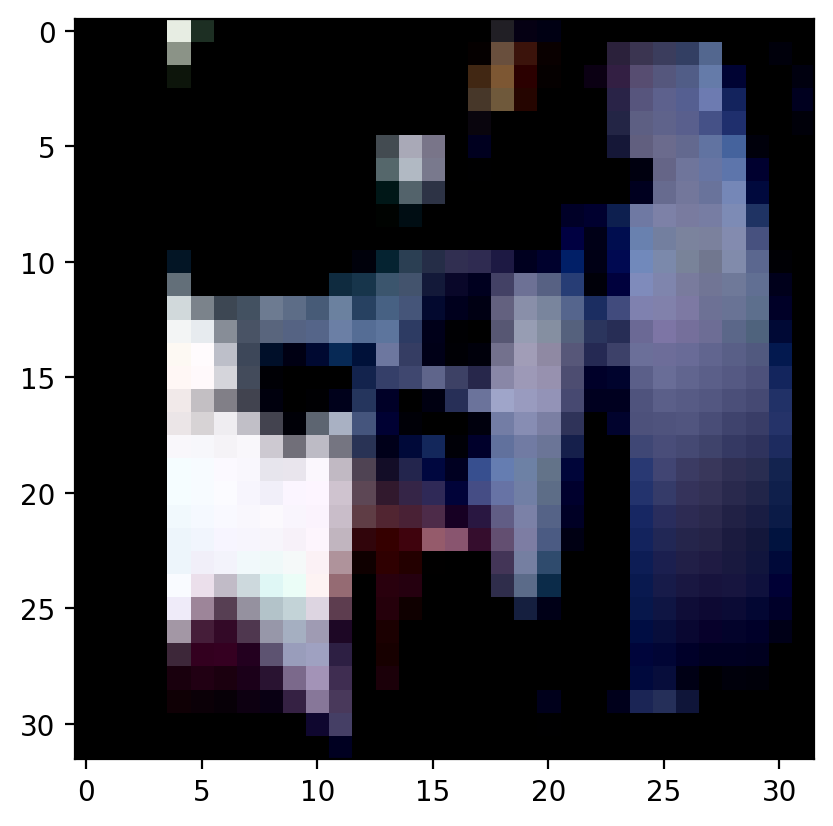

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


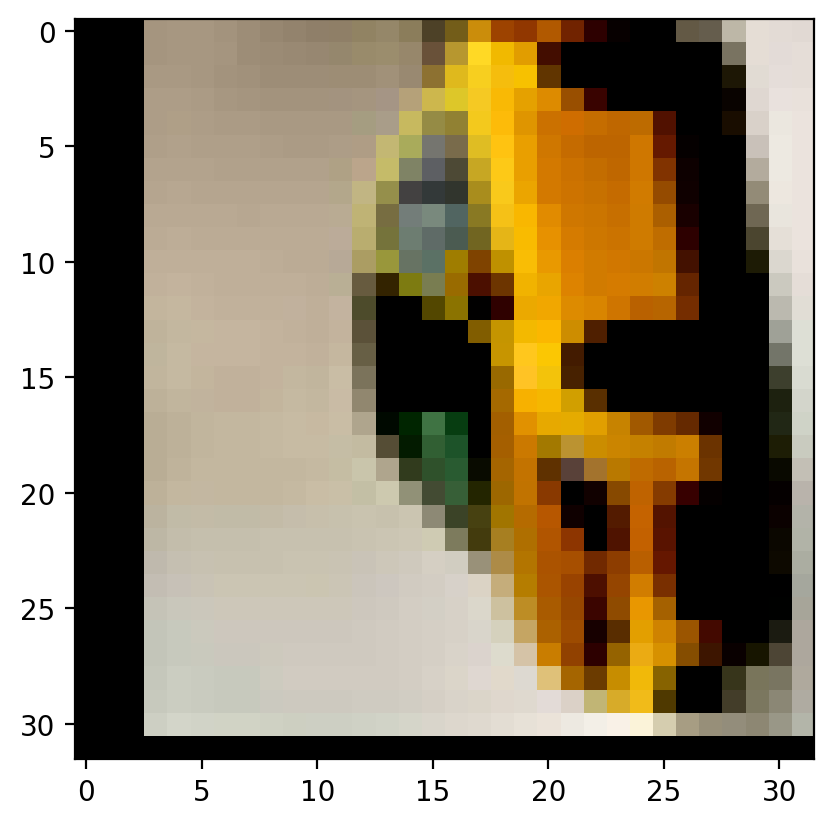

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane


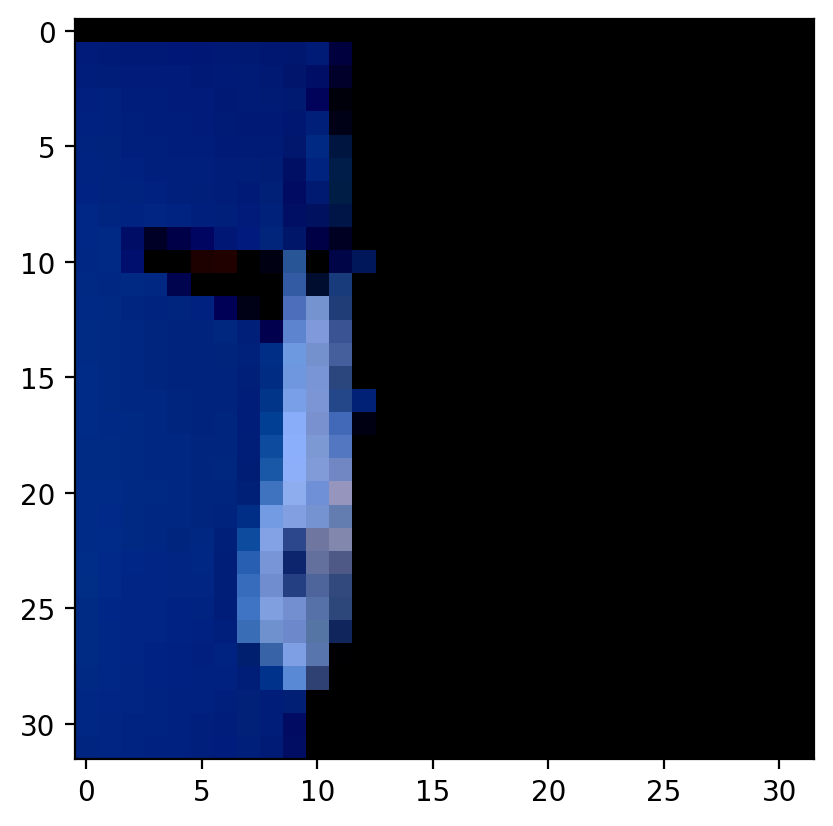

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


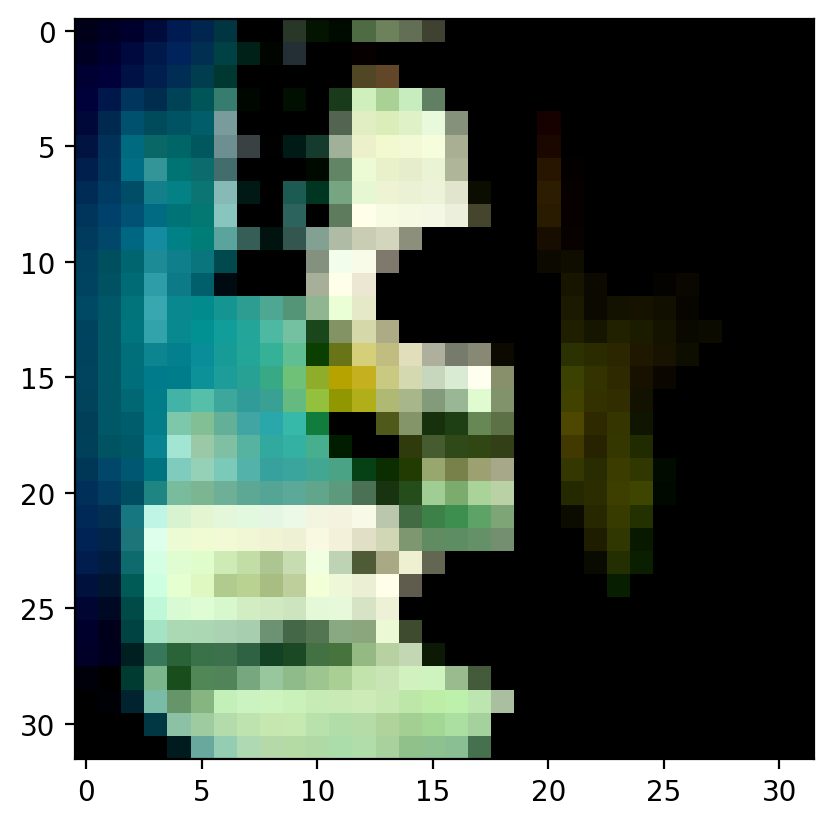

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Valid Loader Examples
cat


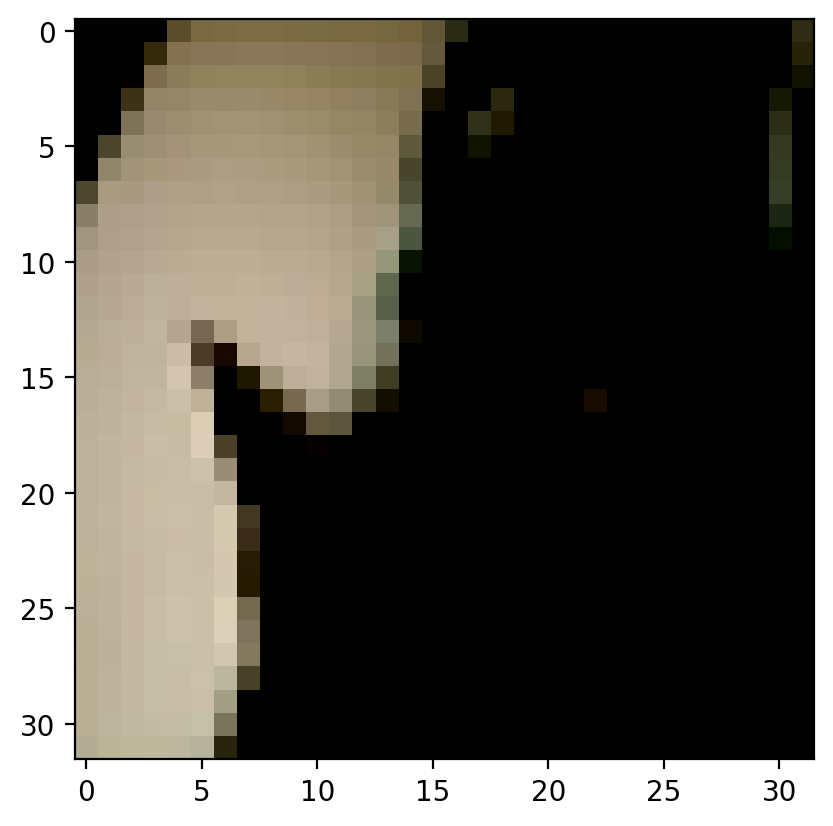

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


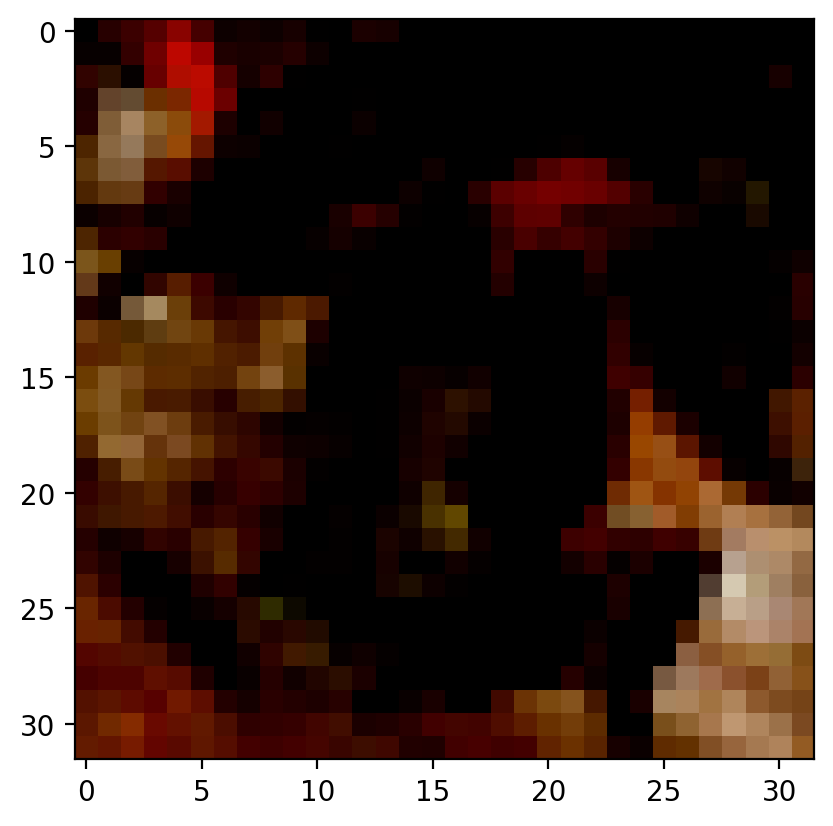

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane


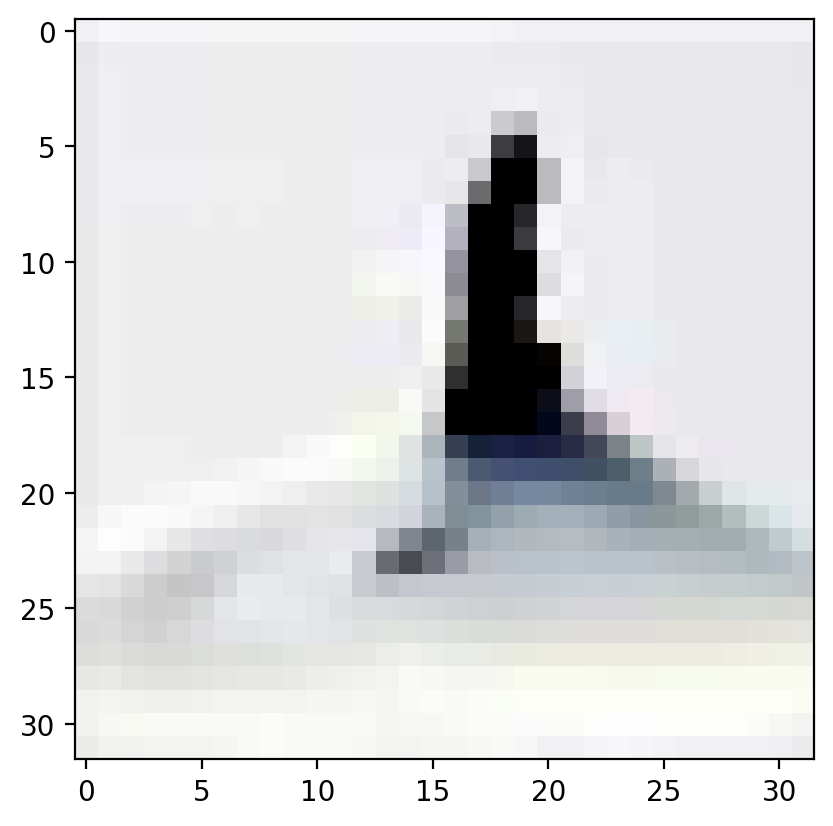

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse


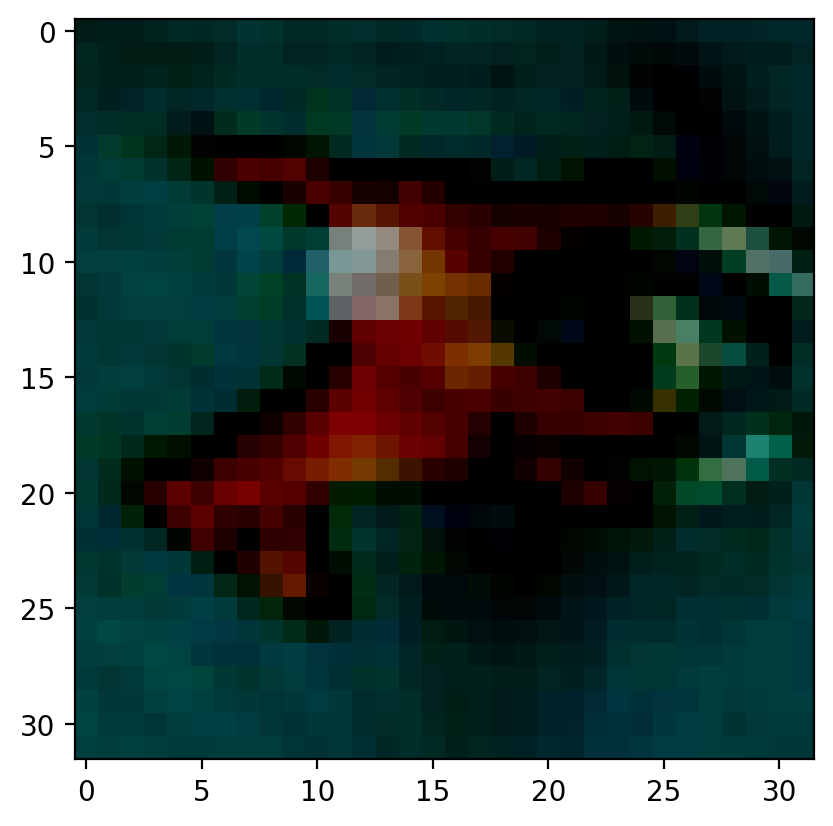

truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


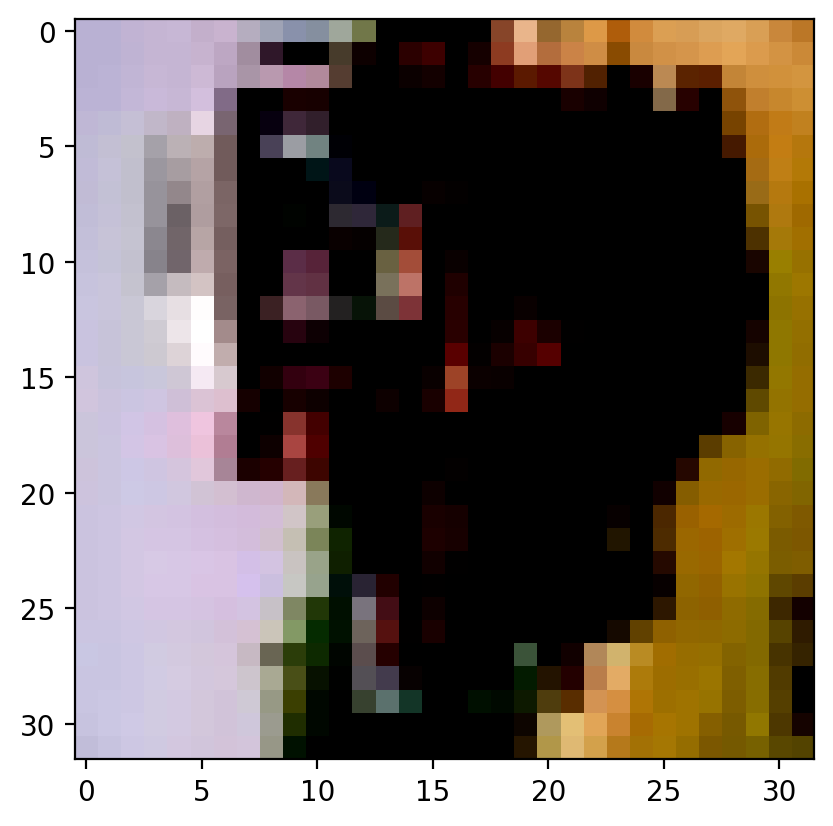

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Loader Examples
ship


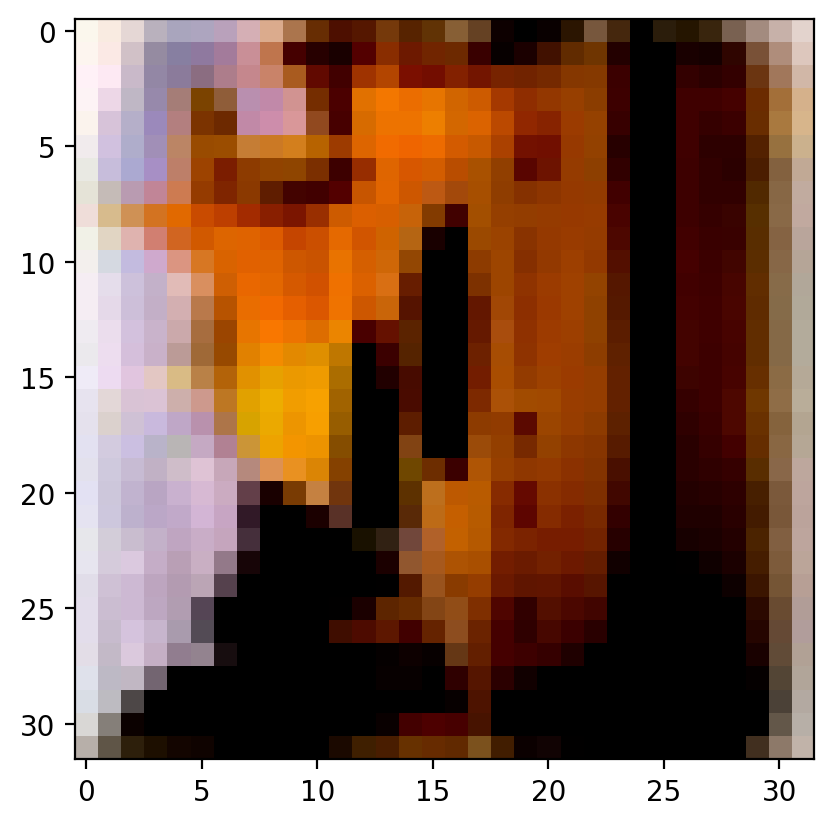

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


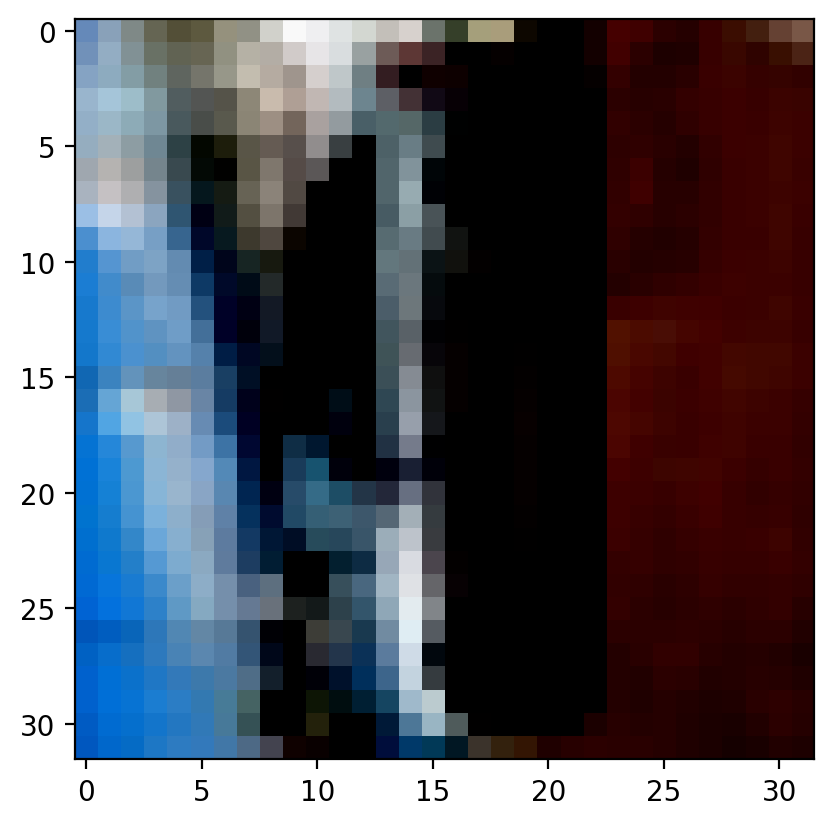

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


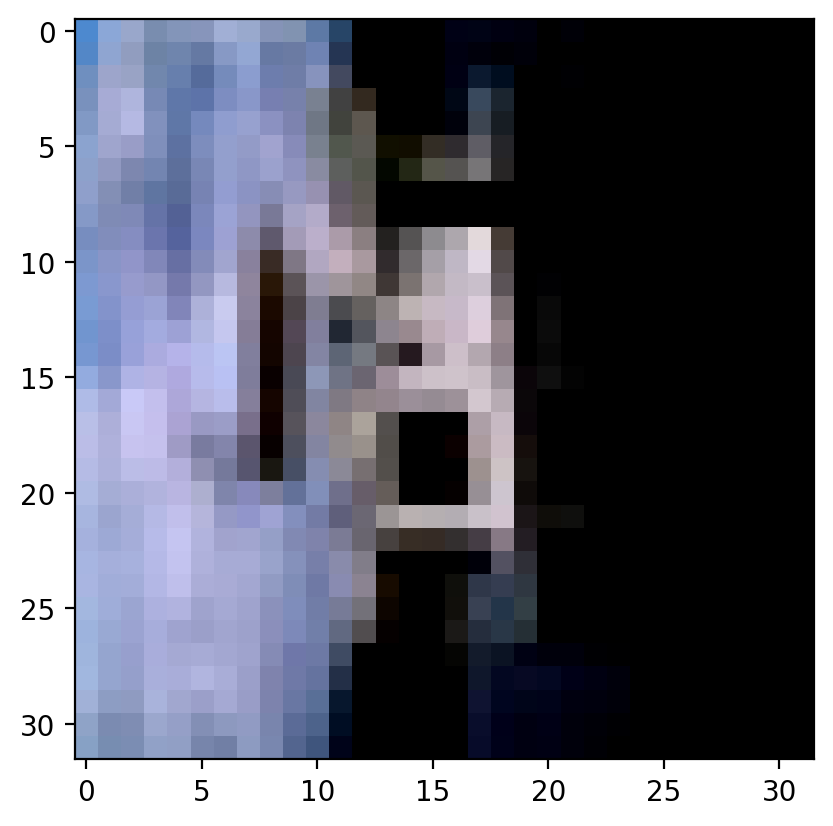

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


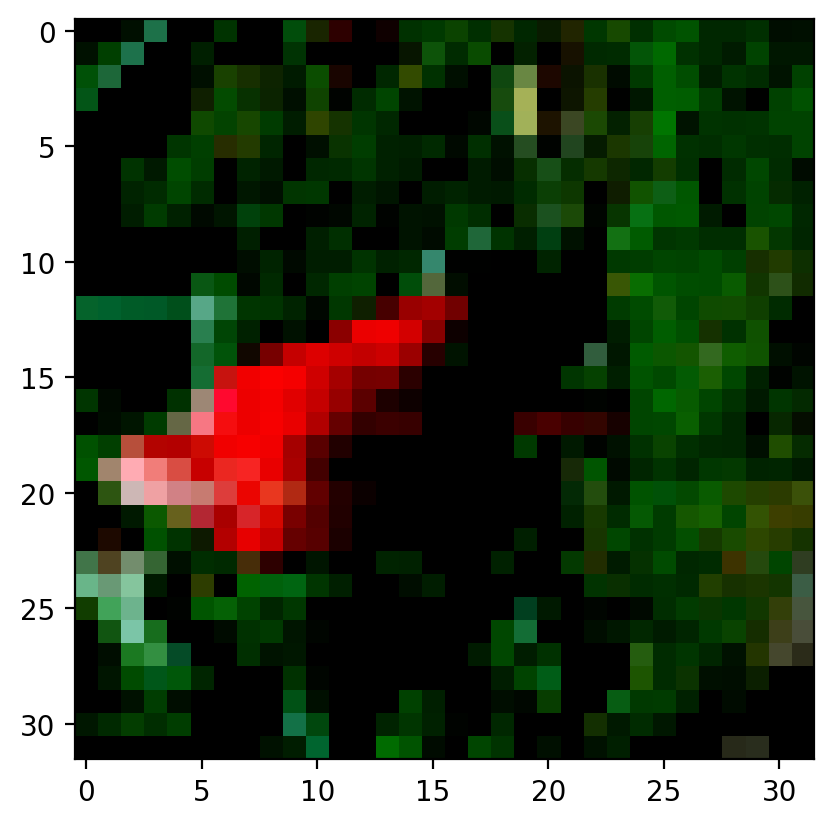

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer


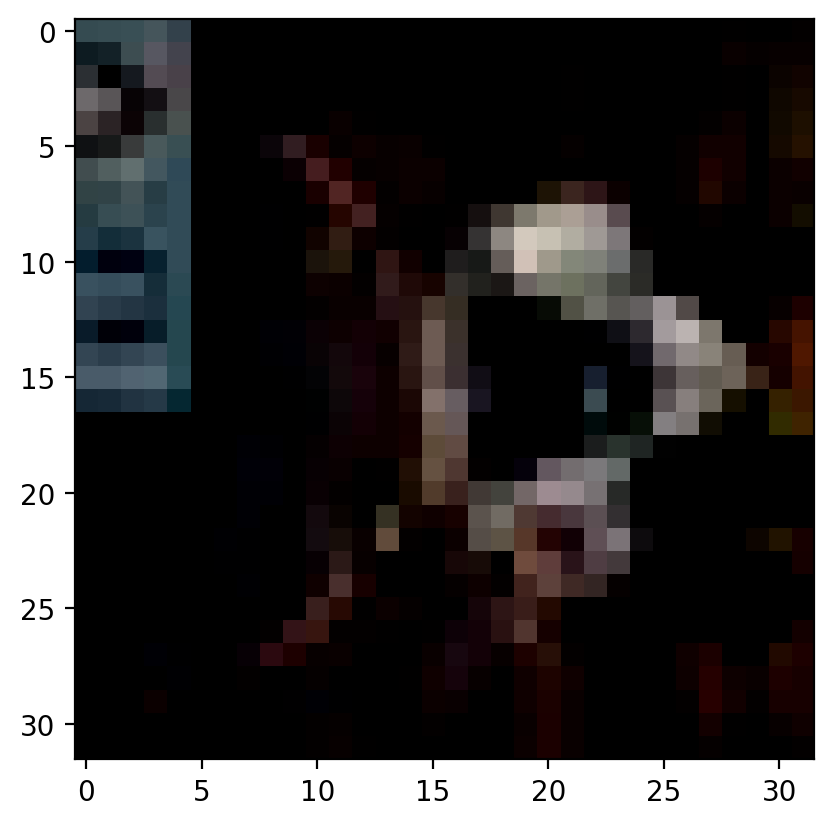

In [4]:
# Explore data
## YOUR CODE HERE ##
#Trainning Images
input_count = 0
for data in train_loader:
    inputs, labels = data
    input_count += labels.size(0)

print("Number of training images: {:,}".format(input_count))

#Validation Images
input_count = 0
for data in valid_loader:
    inputs, labels = data
    input_count += labels.size(0)

print("Number of validation images: {:,}".format(input_count))

#Test Images
input_count = 0
for data in test_loader:
    inputs, labels = data
    input_count += labels.size(0)

print("Number of test images: {:,}".format(input_count))

#Size of Images
batch = next(iter(train_loader))
image = batch[0][0][0:1]
print('Image size: {}x{} pixels'.format(image.size(1), image.size(2)))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#Train Loader Examples
print("Train Loader Examples")
show5(train_loader)
#Valid Loader Examples
print("Valid Loader Examples")
show5(valid_loader)
#Test Loader Examples
print("Test Loader Examples")
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [5]:
## YOUR CODE HERE ##
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        #Convolutional layer (added one sublayer)
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        #Fully Connected layer (added one sublayer)
        self.fc_layer = nn.Sequential(
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=64, out_features=10)
        )
    def forward(self, x):
        #Convolutional layer
        x = self.conv_layer(x)
        x = torch.flatten(x, 1)
        x = self.fc_layer(x)
        return x

    #def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.relu(self.conv2(x)))
        #x = torch.flatten(x, 1) # flatten all dimensions except batch
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        #return x


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
model = Classifier()

#Loss Function -> Cross Entropy
criterion = nn.CrossEntropyLoss()

#Adam or SGD can be used as optimizer, you can see both optimizers' results at the end of the Notebook
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#optimizer = optim.Adam(model.parameters(), lr=0.003)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#Schedular Part (To Adjust Learning Rate)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

In [7]:
#Summary of the Model
from torchinfo import summary
summary(model, input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 4, 4]            --
│    └─Conv2d: 2-1                       [64, 6, 28, 28]           456
│    └─ReLU: 2-2                         [64, 6, 28, 28]           --
│    └─Conv2d: 2-3                       [64, 16, 24, 24]          2,416
│    └─MaxPool2d: 2-4                    [64, 16, 12, 12]          --
│    └─Conv2d: 2-5                       [64, 32, 8, 8]            12,832
│    └─MaxPool2d: 2-6                    [64, 32, 4, 4]            --
├─Sequential: 1-2                        [64, 10]                  --
│    └─Linear: 2-7                       [64, 256]                 131,328
│    └─ReLU: 2-8                         [64, 256]                 --
│    └─Linear: 2-9                       [64, 128]                 32,896
│    └─ReLU: 2-10                        [64, 128]                 -

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
#Currently PyTorch doesn't support Apple M1 Chips directly, so I have to use MPS instead of CUDA (https://towardsdatascience.com/installing-pytorch-on-apple-m1-chip-with-gpu-acceleration-3351dc44d67c)
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())
device = torch.device("mps")
print("Running on", device)

True
True
Running on mps


In [9]:
## YOUR CODE HERE ##
model.to(device)

epochs = 100
running_loss = 0

train_losses, valid_losses, valid_accuracy = [], [], []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        #Transfering Images and Labels to MPS
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()

    #Trainning and Validation Statistics Calculations
    valid_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        #Validation Values Calculations
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)
            valid_loss += batch_loss.item()

            #Validation Accuracy Calculation
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        #Saving Results
        train_losses.append(running_loss / len(train_loader))
        valid_losses.append(valid_loss / len(valid_loader))
        valid_accuracy.append(accuracy / len(valid_loader))

        print(f"Epoch: {epoch+1:>3}/{epochs:>3} "
              f"Train Loss: {running_loss / len(train_loader):.3f} "
              f"Validation Loss: {valid_loss / len(valid_loader):.3f} "
              f"Validation Accuracy: {100 * accuracy / len(valid_loader):.2f}%")

        running_loss = 0
        model.train()

print('Training Finished')

Epoch:   1/100 Train Loss: 2.156 Validation Loss: 1.905 Validation Accuracy: 32.30%
Epoch:   2/100 Train Loss: 1.666 Validation Loss: 1.439 Validation Accuracy: 48.16%
Epoch:   3/100 Train Loss: 1.483 Validation Loss: 1.387 Validation Accuracy: 50.70%
Epoch:   4/100 Train Loss: 1.367 Validation Loss: 1.245 Validation Accuracy: 56.17%
Epoch:   5/100 Train Loss: 1.271 Validation Loss: 1.155 Validation Accuracy: 59.02%
Epoch:   6/100 Train Loss: 1.207 Validation Loss: 1.115 Validation Accuracy: 60.20%
Epoch:   7/100 Train Loss: 1.149 Validation Loss: 1.078 Validation Accuracy: 63.24%
Epoch:   8/100 Train Loss: 1.089 Validation Loss: 1.032 Validation Accuracy: 64.80%
Epoch:   9/100 Train Loss: 1.053 Validation Loss: 0.984 Validation Accuracy: 66.09%
Epoch:  10/100 Train Loss: 1.006 Validation Loss: 0.927 Validation Accuracy: 67.38%
Epoch:  11/100 Train Loss: 0.973 Validation Loss: 0.935 Validation Accuracy: 68.09%
Epoch:  12/100 Train Loss: 0.945 Validation Loss: 0.916 Validation Accuracy:

Plot the training loss (and validation loss/accuracy, if recorded).

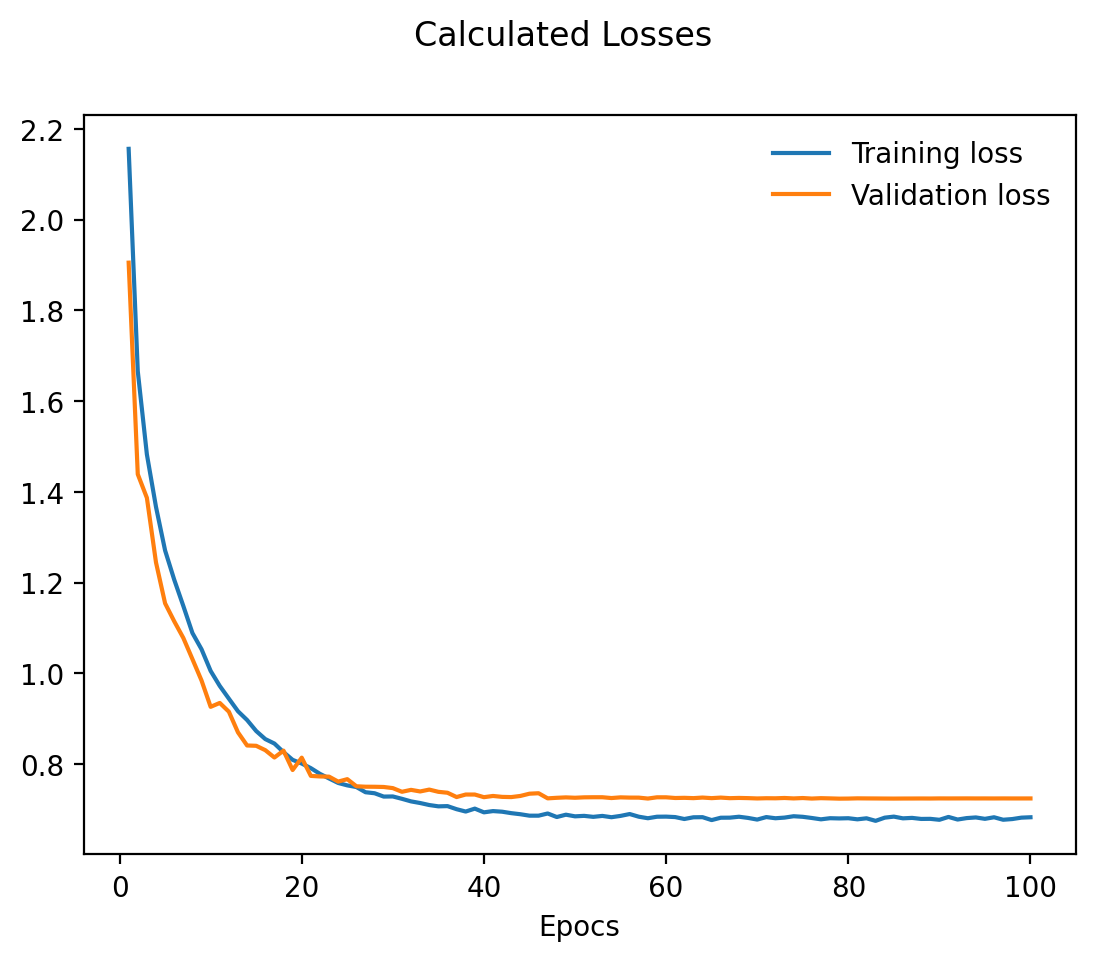

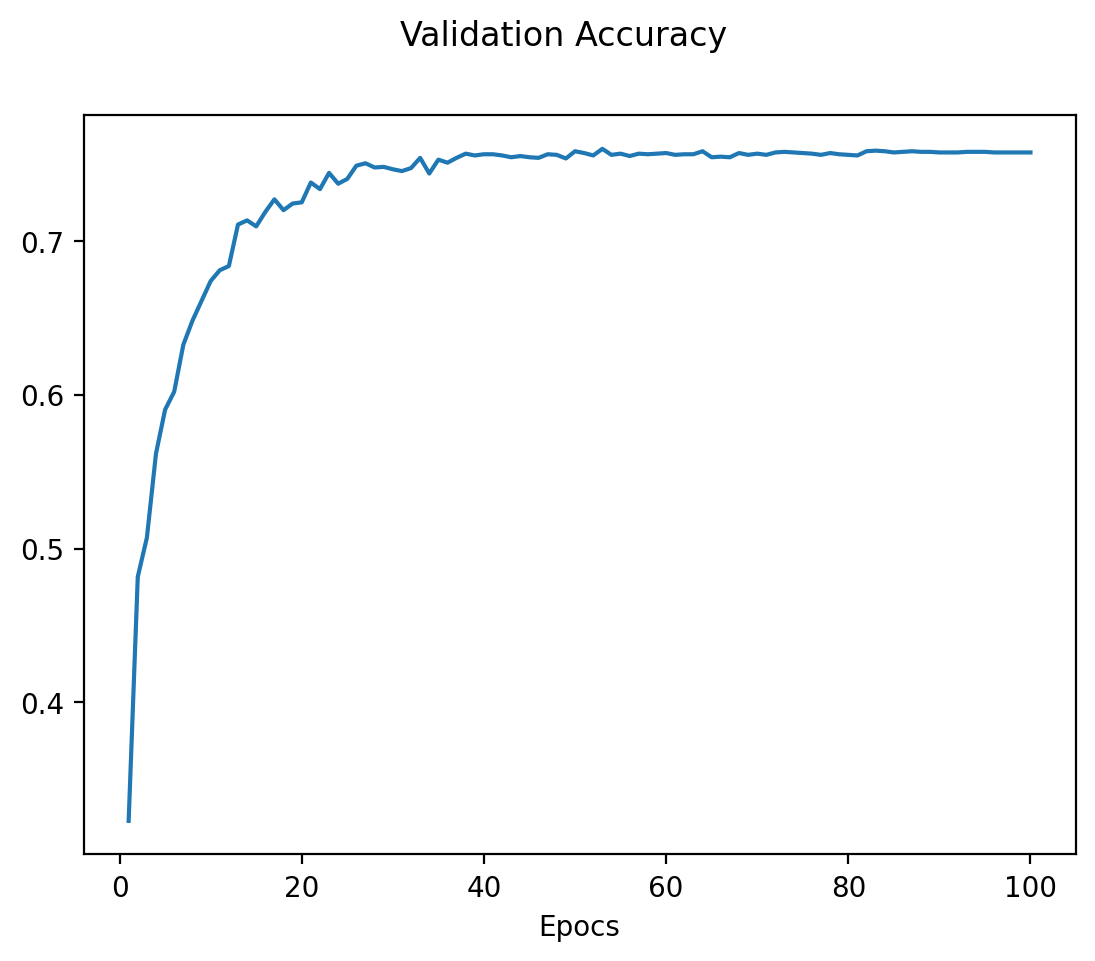

In [13]:
## YOUR CODE HERE ##
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.suptitle('Calculated Losses')
plt.plot(range(1,len(train_losses)+1), train_losses, label='Training loss')
plt.plot(range(1,len(valid_losses)+1), valid_losses, label='Validation loss')
plt.xlabel('Epocs')
plt.legend(frameon=False)
plt.show()

plt.suptitle('Validation Accuracy')
plt.plot(range(1,len(valid_accuracy)+1), valid_accuracy)
plt.xlabel('Epocs')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
correct = 0
total = 0

input_count = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        #Transfering images and labels to MPS
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        input_count += labels.size(0)

print("Accuracy of the network on the {:,} test images: {:.2f}%".format(input_count, ((correct / total) * 100)))

Accuracy of the network on the 7,500 test images: 76.00%


## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.



**Double click this cell to modify it**

Adam Optimizer, 0.75 test, 0.25 validation split -> Accuracy of the network on the 7,500 test images: 75.67%
Adam Optimizer, 0.8 test, 0.2 validation split -> Accuracy of the network on the 8,000 test images: 75.74%
***SGD Optimizer, 0.75 test, 0.25 validation split -> Accuracy of the network on the 7,500 test images: 76.00%
SGD Optimizer, 0.8 test, 0.2 validation split -> Accuracy of the network on the 8,000 test images: 75.99%

The accuracy of the best model is 76% on the 7,500 test images.

With these results, although I could not pass any of the algorithms given at the beginning of this notebook, I was able to achieve an accuracy almost equal to the Deep Belief Networks.

As a result, I believe that using the CIFAR-10 algorithm with the parameters I tuned above would be in the best interest of the company, rather than buying an algorithm from another source.
